# Subclustering of midline cells in Set 2

In [1]:
#Loading packages
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#loading data
seu_HQC <- readRDS(file = '../../data/220726_seurat_object_Set2/seu_HQC2_220726.obj')
seu_HQC

An object of class Seurat 
28364 features across 4897 samples within 2 assays 
Active assay: SCT (10860 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, tsne, umap

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


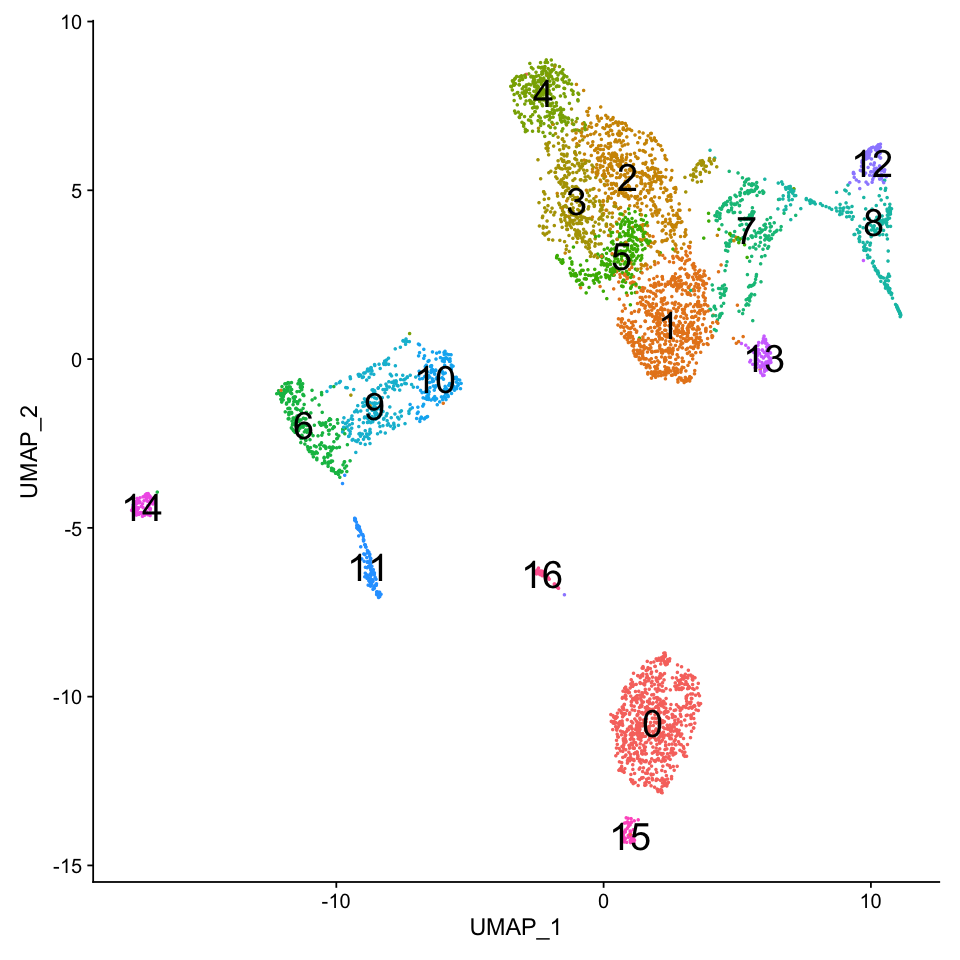

In [3]:
Idents(seu_HQC) <- 'seurat_clusters'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label = TRUE, label.size = 8) + NoLegend()

## picking up target clusters

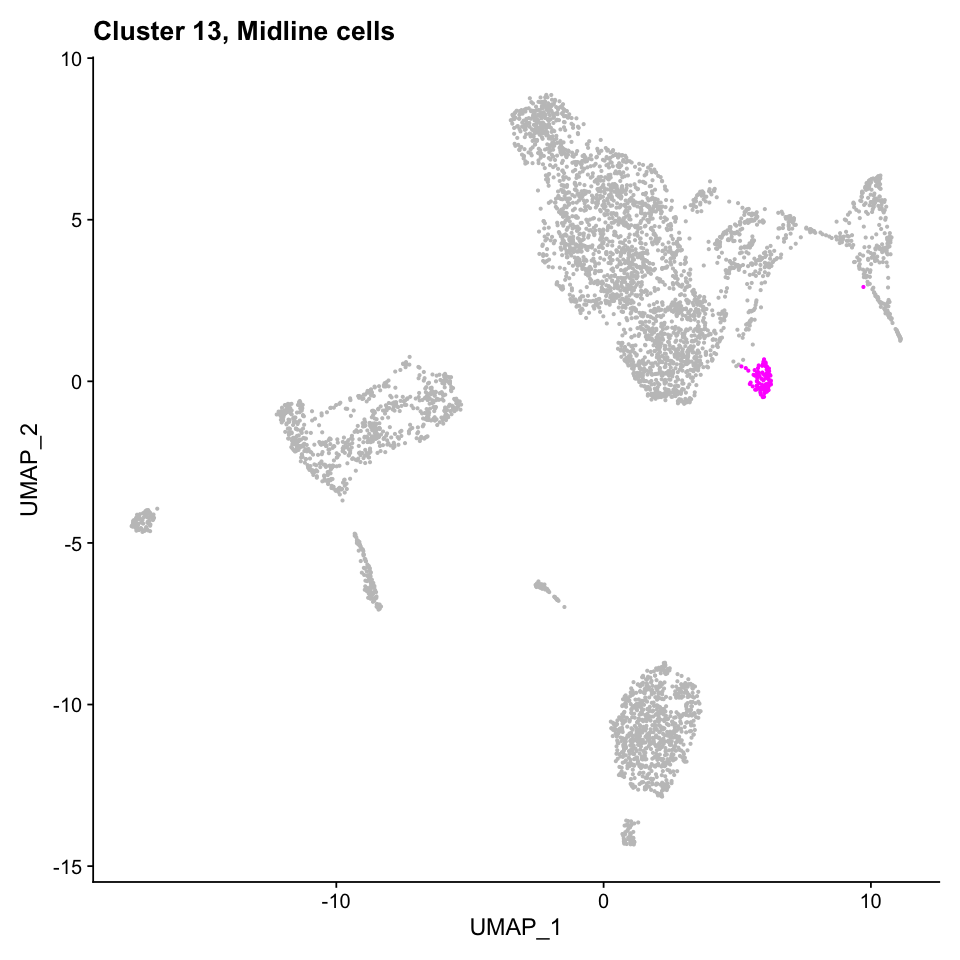

In [4]:
options(repr.plot.width=8, repr.plot.height=8)
highlight.cells <- WhichCells(seu_HQC,idents = c(13))
DimPlot(seu_HQC, reduction =  "umap", cells.highlight = highlight.cells, pt.size = 0.5, sizes.highlight = 0.5,
        cols.highlight = 'magenta', label = FALSE) + NoLegend()+ ggtitle('Cluster 13, Midline cells')

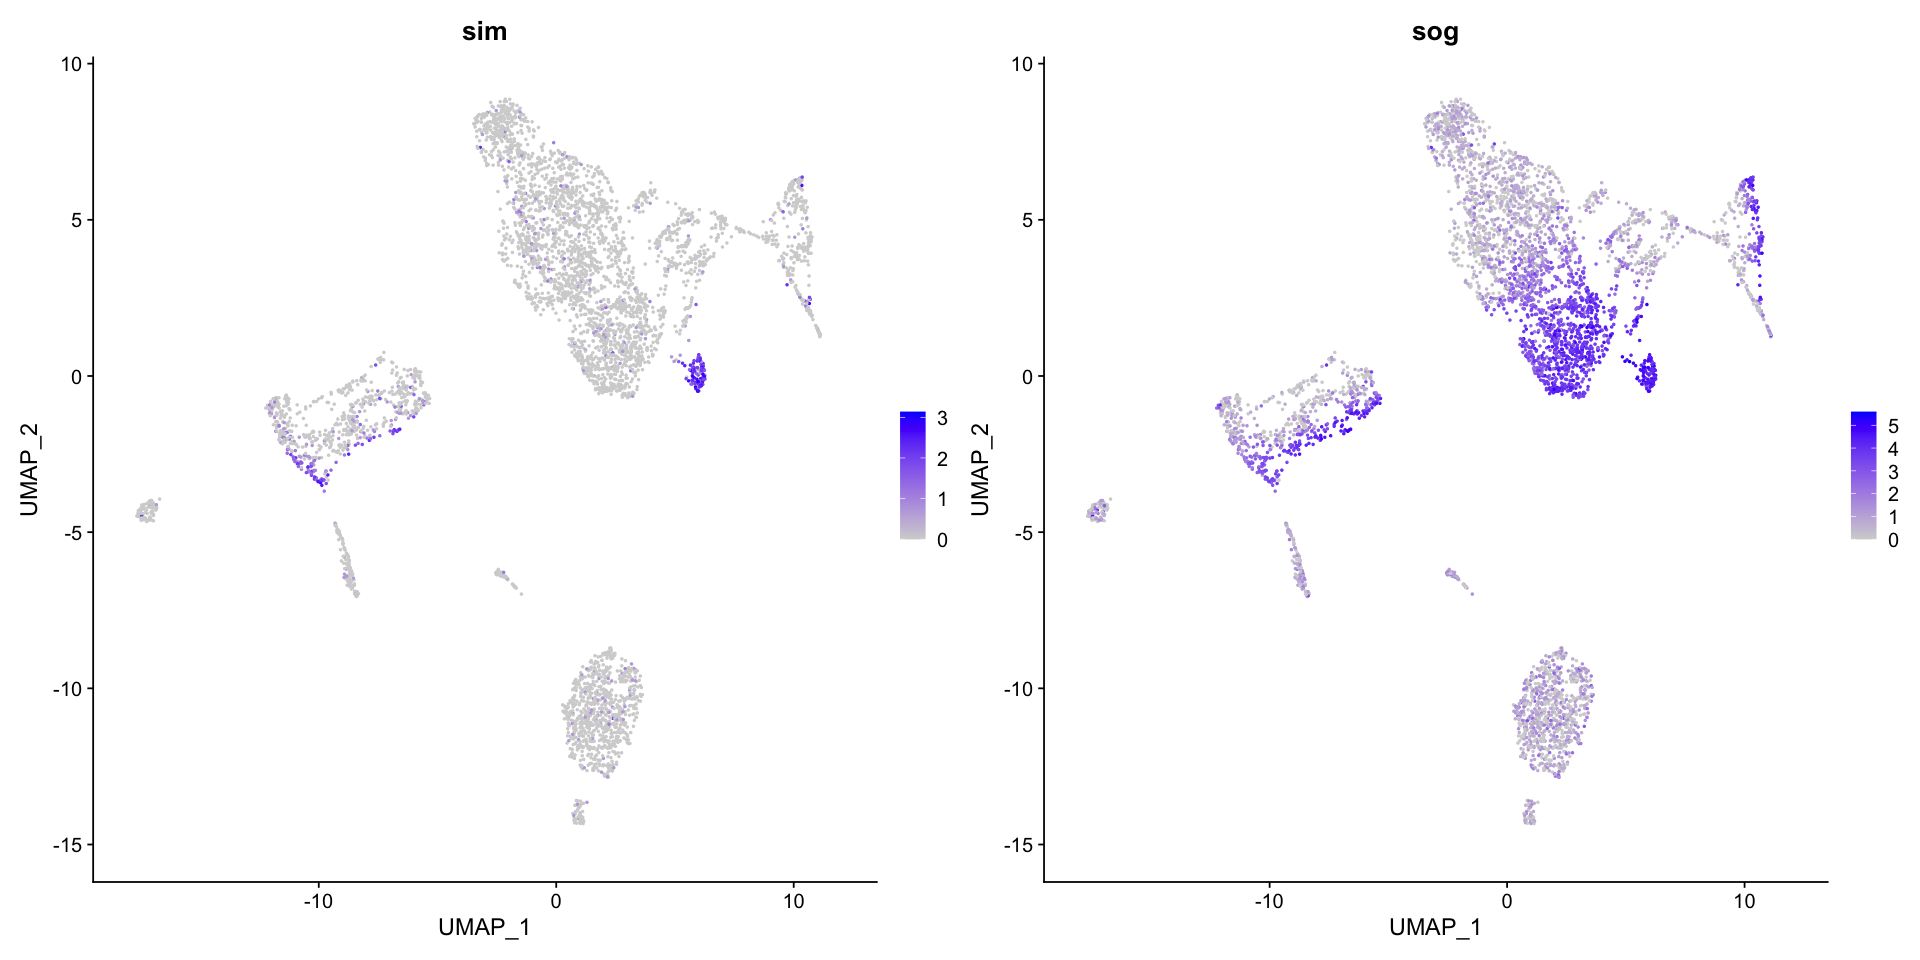

In [5]:
options(repr.plot.width=16, repr.plot.height=8)
FeaturePlot(seu_HQC, features = c('sim','sog'))

In [6]:
seu.midline <- subset(seu_HQC, ident = c(13))
seu.midline

An object of class Seurat 
28364 features across 96 samples within 2 assays 
Active assay: SCT (10860 features, 3000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, tsne, umap

## Clustering
Num of cells < 500  
Skipping re-normalize

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  zfh1, ths, cv-2, sna, rib, Egfr, mirr, Meltrin, dpp, disco 
	   tup, aop, Act87E, Atx-1, hll, peb, CG45263, twi, Doc1, CG10479 
	   RapGAP1, CadN, fkh, srp, wb, phu, stumps, egr, Lac, net 
Negative:  rho, sim, sog, wntD, D, edl, ImpL2, E(spl)m7-HLH, toc, vn 
	   Sema1b, vnd, brk, SoxN, Zasp52, CG43355-sala, E(spl)m4-BFM, bbg, jeb, S 
	   HGTX, Brd, mfas, Ndae1, Cyp4g1, BobA, Ilp4, Cyp310a1, E(spl)m5-HLH, Ocho 
PC_ 2 
Positive:  toc, lncRNA:bxd, brk, vnd, CG16758, SoxN, trn, scyl, lncRNA:CR43432, Esp 
	   Ubx, ftz, mid, E(spl)m5-HLH, Nrt, odd, CG9005, Brd, abd-A, kis 
	   pigs, E(spl)m8-HLH, mtd, S, wech, Alh, tsh, Dl, kek2, lncRNA:CR43887 
Negative:  CG43355-sala, salm, D, wntD, lncRNA:CR44931, Ect3, Ilp4, eEF1alpha1, lncRNA:CR45559, ImpL2 
	   CG11498, CG13427, Ndae1, CG3097, sog, Dfd, RpS18, RpL27A, Calr, path 


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 96
Number of edges: 4522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.2000
Number of communities: 1
Elapsed time: 0 seconds


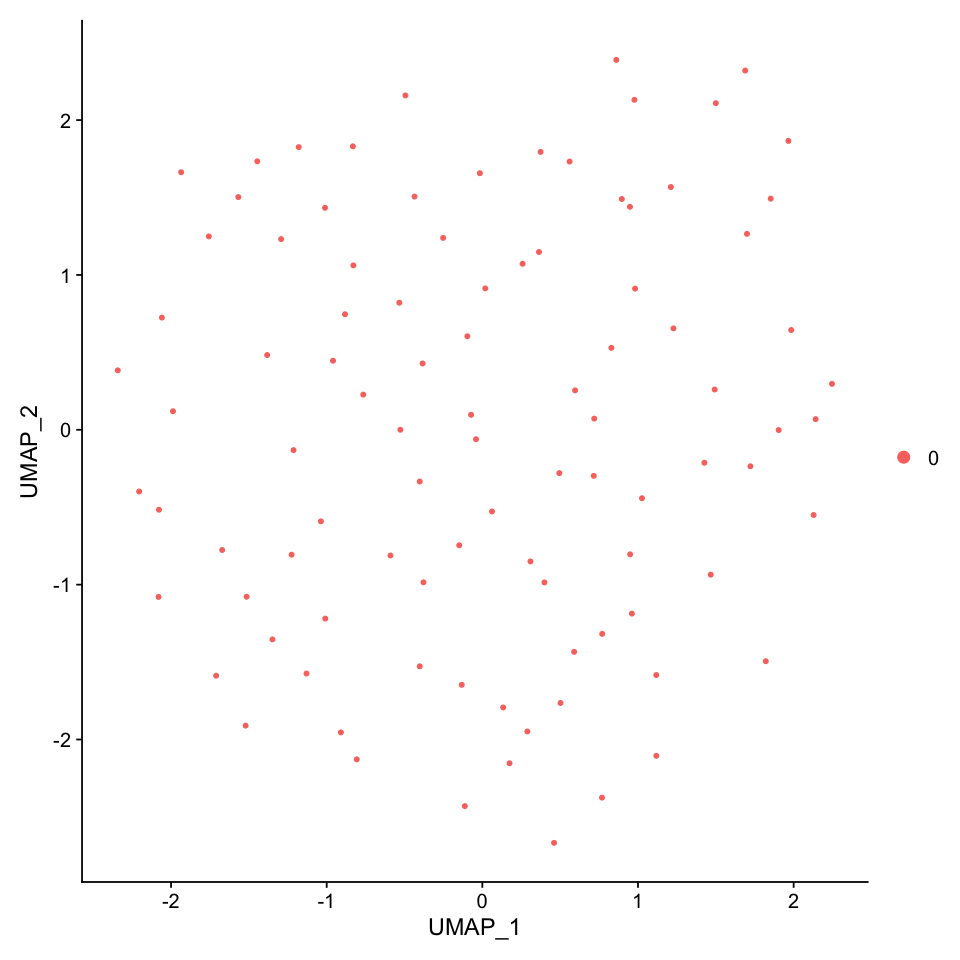

In [8]:
options(repr.plot.width=8, repr.plot.height=8)
seu.midline <- RunPCA(seu.midline)
seu.midline <- RunUMAP(seu.midline, dims = 1:30)
seu.midline <- FindNeighbors(seu.midline, dims = 1:30)
seu.midline <- FindClusters(seu.midline)
DimPlot(seu.midline, reduction = 'umap')

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 96
Number of edges: 4522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.0733
Number of communities: 3
Elapsed time: 0 seconds


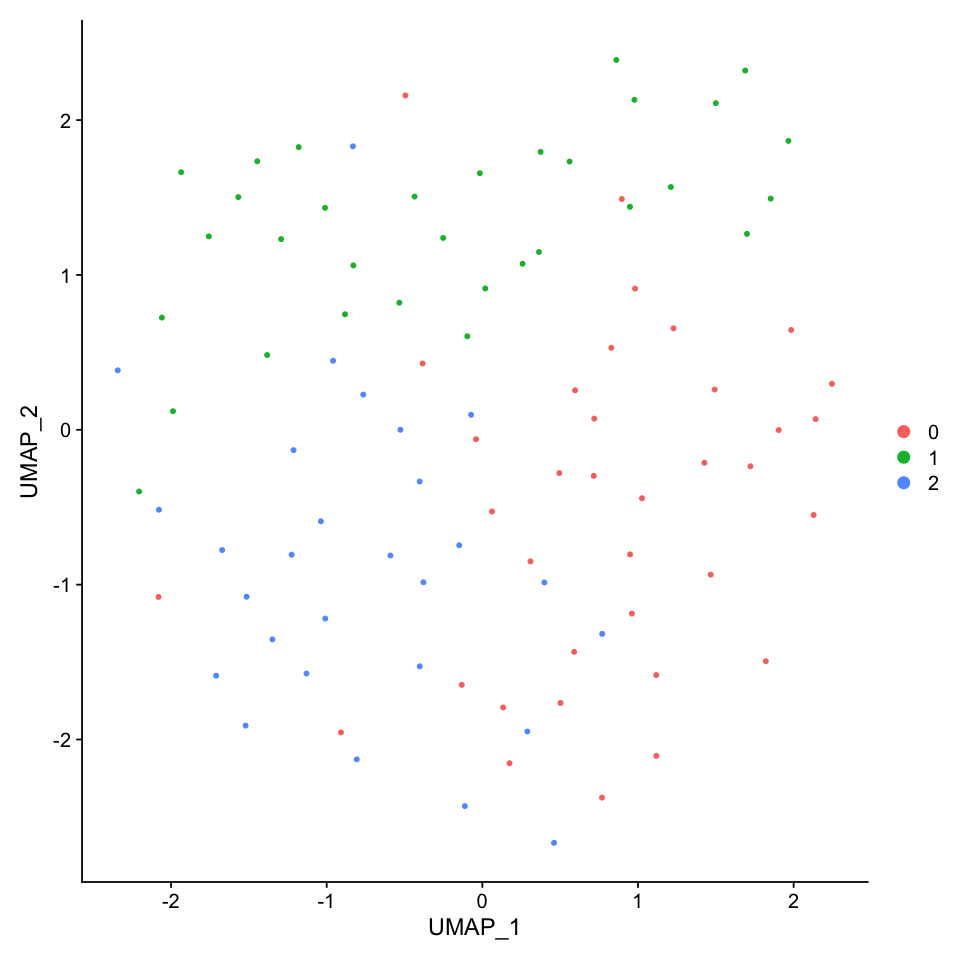

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
seu.midline <- FindClusters(seu.midline, resolution = 1.0)
DimPlot(seu.midline, reduction = 'umap')

In [11]:
all.markers <- FindAllMarkers(object = seu.midline, only.pos = TRUE)
nrow(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2



[1] 299

[1] 30

Warning message in DoHeatmap(seu.midline, features = c(all.markers.top10$gene, "trn")):
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: CG10418, Rpn12, Apf, slmo-CG34179, ND-13B, CG15715”


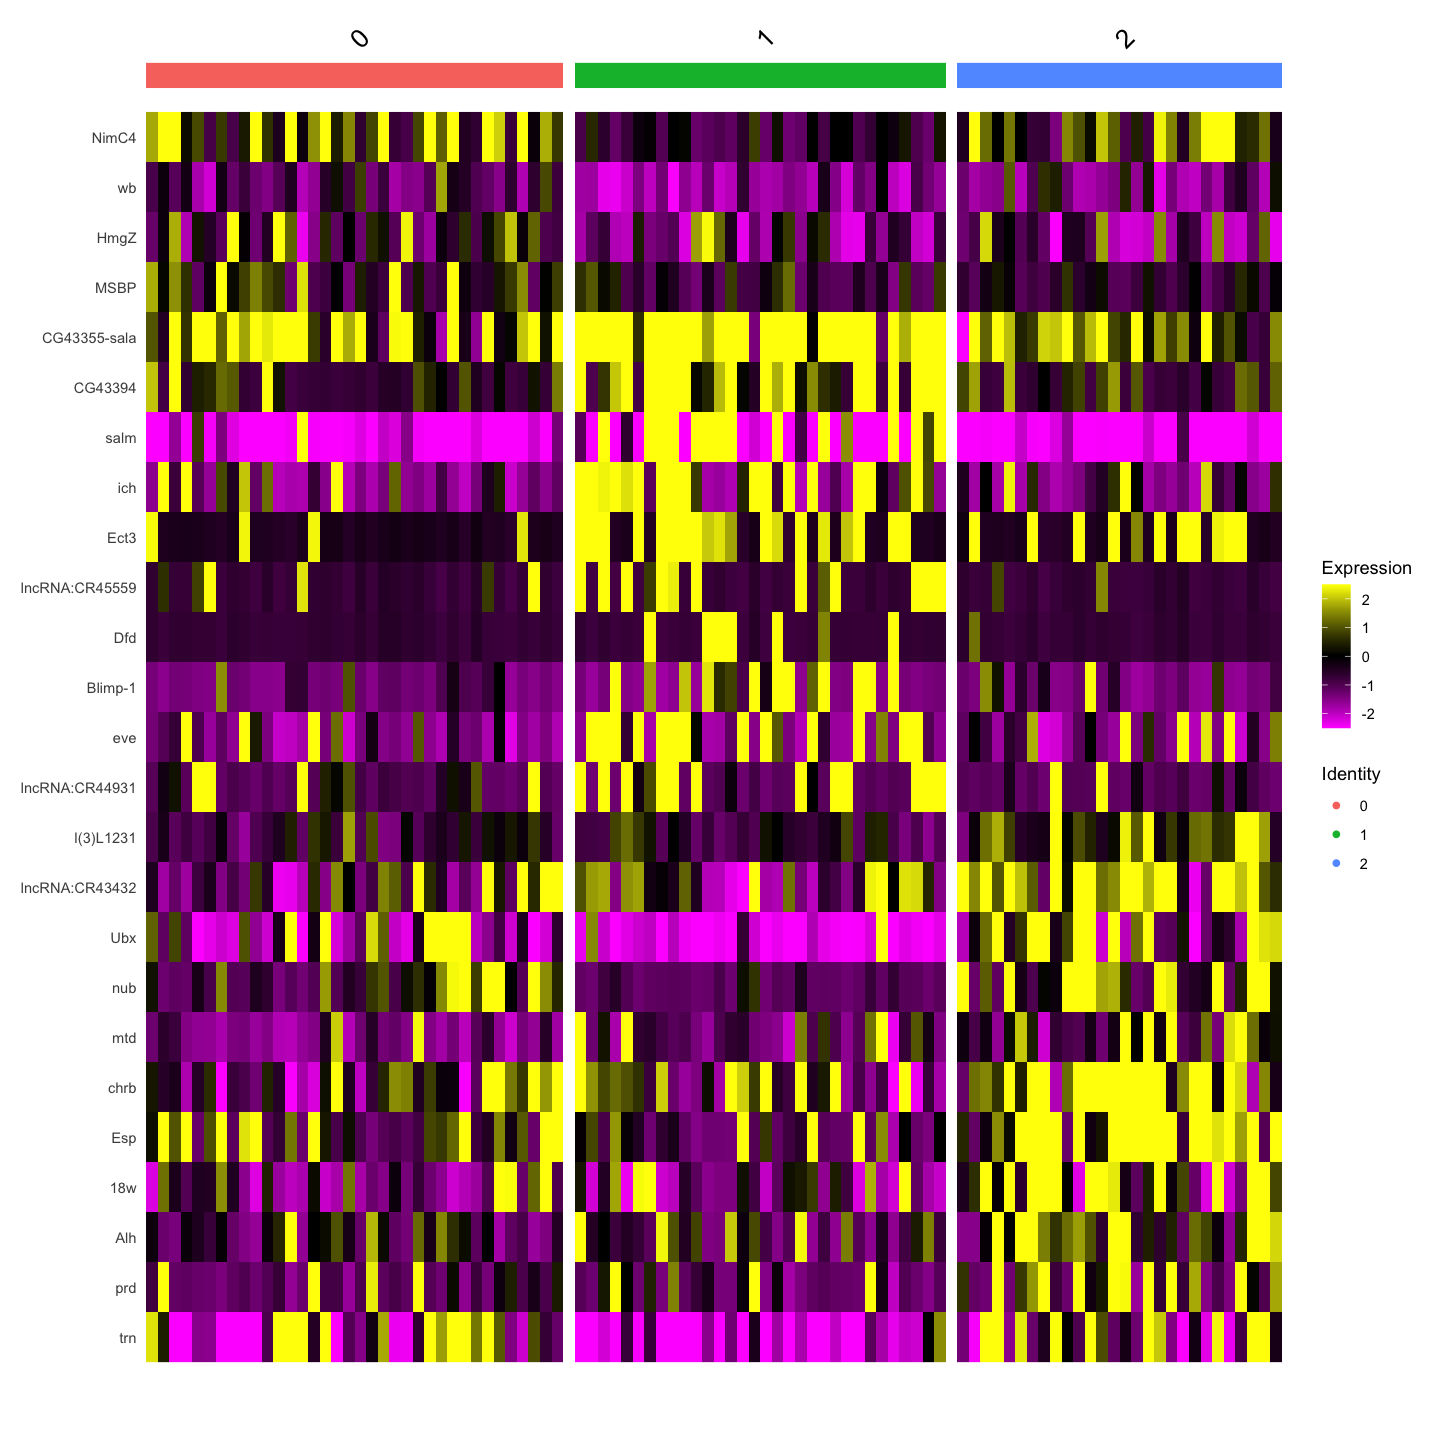

In [13]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu.midline, features = c(all.markers.top10$gene))

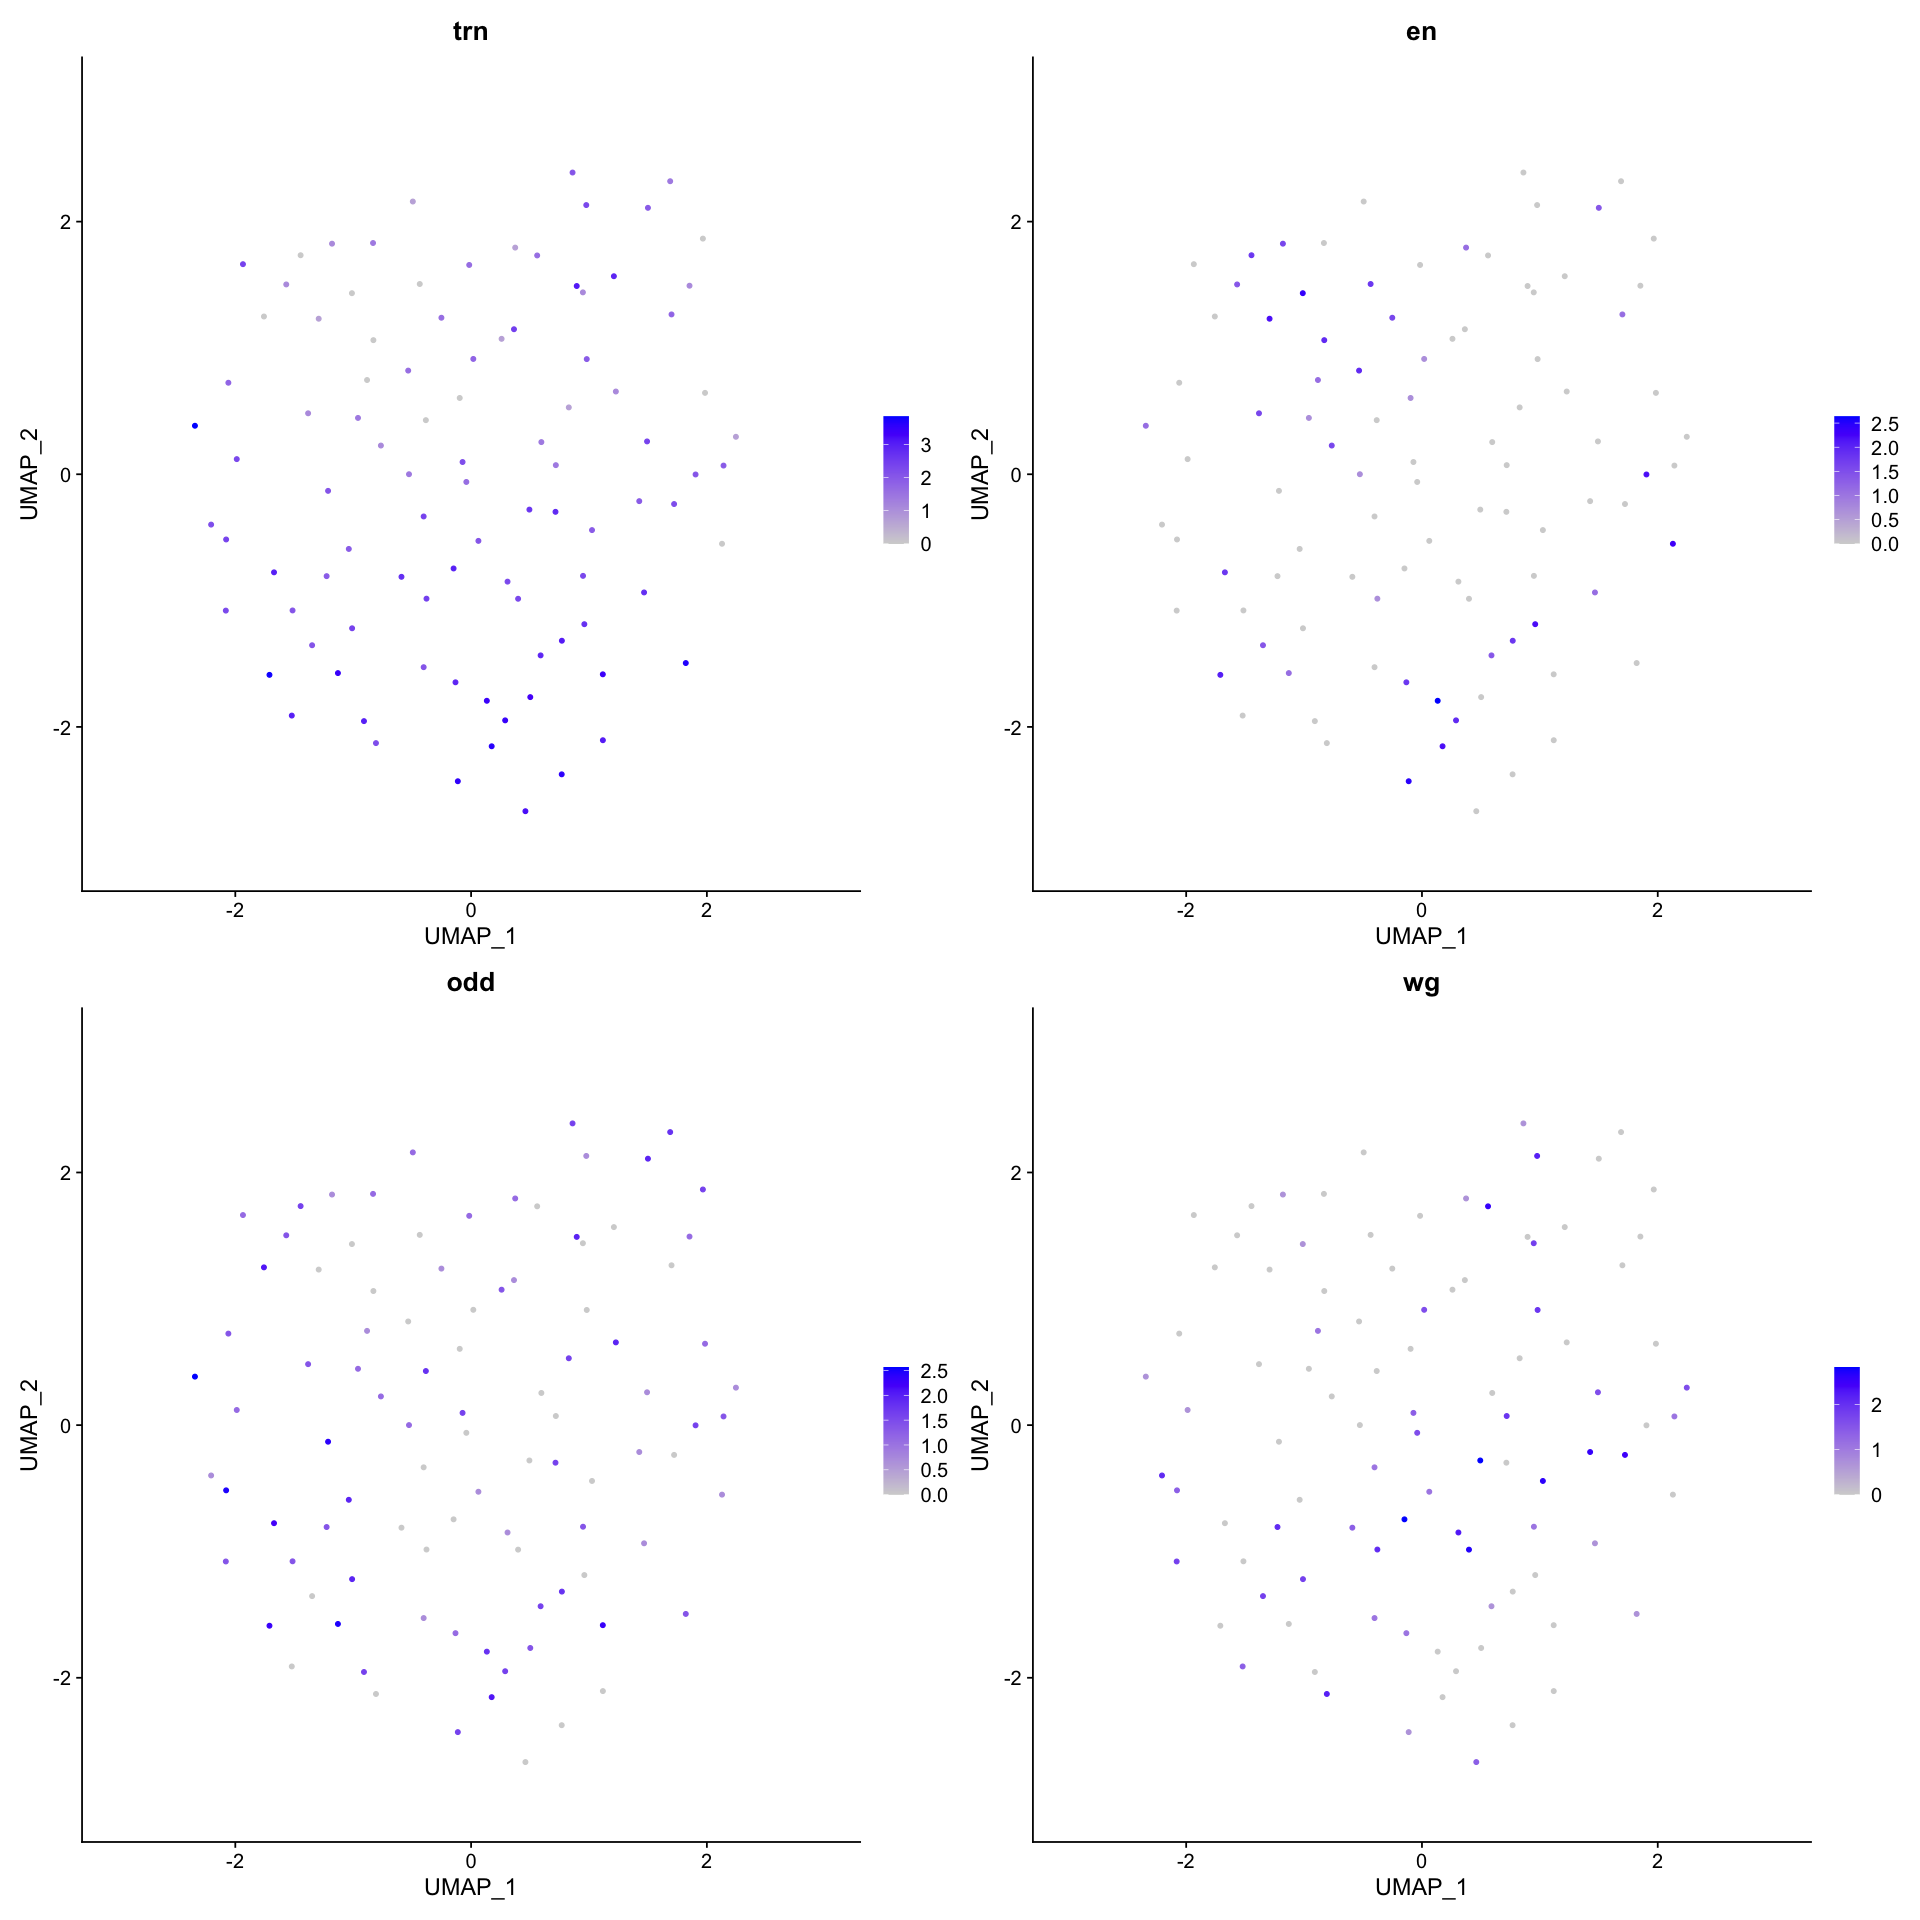

In [14]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu.midline, features = c('trn','en','odd','wg'))

no clear subclusters